# The Keras Blog
## Building Autoencoders in Keras

### What are autoencoders?

1) Autoencoderは学習したデータと同様のものしか圧縮できない、学習したデータ固有の生成モデルを構築する。

2) Autoencoderは非可逆圧縮(lossy)であり、モデルを通して展開された出力は入力と比較して劣化している。

3) Autoencoderはサンプルを自動で学習する。特定の入力に対して機能するアルゴリズムの特化したインスタンスの学習が容易であることを意味する。

Autoencoderの構築に必要な機能は3つ。encoding、decoding、loss functionである。圧縮と展開のパラメータは再構築の際の損失を最小化するように確率的勾配降下法(SGD)を使って最適化される。



### Are they good at data compression?

Usually, not really.

圧縮の実応用において、AutoencoderをJPEGやその他のアルゴリズムより良く機能するようにトレーニングすることは困難である。通常、特定のタイプに特化することでしかJPEG等のアルゴリズムを超えることはできない。

これは、Autoencoderがdata-specificであるという事実が一般的にAutoencoderを非実用的にしていることが原因である。

私たちはAutoencoderが学習したことのあるデータのみについてAutoencoderを圧縮機として使うことができ、Autoencoderを汎用的にするには膨大なトレーニングが求められる。

しかし未来にどうなっているかは、神のみぞ知る。

### What are autoencodrs good for?

Autoencoderは、data denoisingとdimensionality reduntion for data visualizaitonについて興味深い応用例がある。

適切な次元性や制約の希薄さと共に、Autoencoderはデータの写像を学習することができる。

2次元可視化については、恐らくt-SNEがベストアルゴリズムであるが、t-SNEは比較的データが低次元であることが求められる。

Autoencoderを高次元から低次元へのデータ圧縮に用い、次にt-SNEを使用して圧縮データを二次元可視化することが、高次元データの類似性を可視化するための良質な戦略となりうる。


### So what's the big deal with autoencoders?

write later

### Simple Autoencoder

In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.layers import Input, Dense
from keras.models import Model

In [4]:
encoding_dim = 32

input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)

decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
encoder = Model(input_img, encoded)

In [6]:
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [7]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [8]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 16s 1us/step


In [9]:
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test  = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [10]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [11]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.3597 - val_loss: 0.2712
Epoch 2/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.2642 - val_loss: 0.2535
Epoch 3/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.2428 - val_loss: 0.2300
Epoch 4/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.2222 - val_loss: 0.2123
Epoch 5/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.2072 - val_loss: 0.1997
Epoch 6/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.1958 - val_loss: 0.1896
Epoch 7/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.1868 - val_loss: 0.1817
Epoch 8/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.1797 - val_loss: 0.1752
Epoch 9/50
60000/60000 [==============================] - 3s 5

In [12]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [14]:
import matplotlib.pyplot as plt

In [15]:
%matplotlib inline

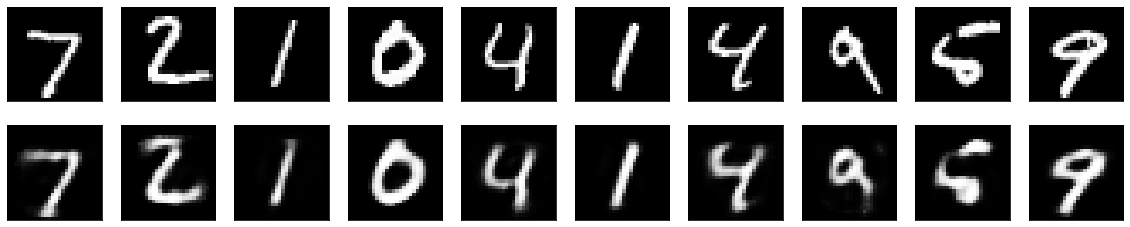

In [16]:
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

### Sparse Autoencoder

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

Using TensorFlow backend.


In [2]:
encoding_dim = 32
input_img = Input(shape=(784,))

In [3]:
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(1e-6))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
autoencoder = Model(input_img, decoded)

In [8]:
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))

In [9]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [10]:
from keras.datasets import mnist
import numpy as np

In [11]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train)), np.prod(x_train.shape[1:]))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print('x_train.shape: {}'.format(x_train.shape))
print('x_test.shape: {}'.format(x_test.shape))

x_train.shape: (60000, 784)
x_test.shape: (10000, 784)


In [12]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.3757 - val_loss: 0.2877
Epoch 2/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.2821 - val_loss: 0.2747
Epoch 3/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.2677 - val_loss: 0.2595
Epoch 4/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.2537 - val_loss: 0.2455
Epoch 5/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.2400 - val_loss: 0.2316
Epoch 6/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.2273 - val_loss: 0.2199
Epoch 7/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.2170 - val_loss: 0.2109
Epoch 8/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.2092 - val_loss: 0.2043
Epoch 9/50
60000/60000 [==============================] - 3s 5

In [13]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
print('encoded_imgs.mean(): {}'.format(encoded_imgs.mean()))
print('decoded_imgs.mean(): {}'.format(decoded_imgs.mean()))

encoded_imgs.mean(): 1.7771519422531128
decoded_imgs.mean(): 0.1332922875881195


In [15]:
import matplotlib.pyplot as plt

In [16]:
%matplotlib inline

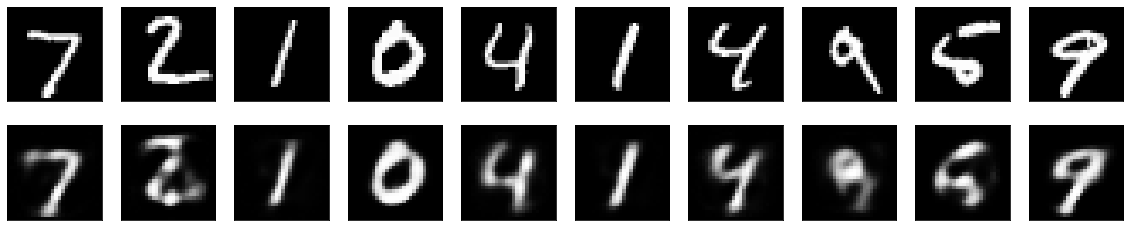

In [17]:
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

### Deep Autoencoder

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [2]:
encoding_dim = 32

input_img = Input(shape=(784,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test  = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [5]:
autoencoder = Model(input_img, decoded)

In [6]:
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(32,))

decoded = autoencoder.layers[-3](encoded_input)
decoded = autoencoder.layers[-2](decoded)
decoded = autoencoder.layers[-1](decoded)

decoder = Model(encoded_input, decoded)

In [7]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.3338 - val_loss: 0.2631
Epoch 2/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.2584 - val_loss: 0.2542
Epoch 3/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.2466 - val_loss: 0.2386
Epoch 4/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.2312 - val_loss: 0.2207
Epoch 5/100
60000/60000 [==============================] - 3s 44us/step - loss: 0.2120 - val_loss: 0.2032
Epoch 6/100
60000/60000 [==============================] - 3s 43us/step - loss: 0.1996 - val_loss: 0.1957
Epoch 7/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.1891 - val_loss: 0.1803
Epoch 8/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.1782 - val_loss: 0.1740
Epoch 9/100
60000/60000 [=============================

In [8]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

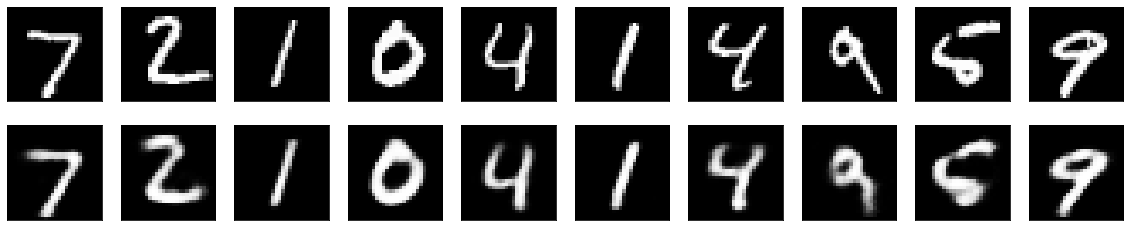

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Convolutional autoencoder

In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

Using TensorFlow backend.


In [2]:
input_img = Input(shape=(28, 28, 1))

In [3]:
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [6]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [7]:
encoder = Model(input_img, encoded)

In [8]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [9]:
from keras.callbacks import TensorBoard

In [10]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test, x_test), callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 72s 1ms/step - loss: 0.2062 - val_loss: 0.1655
Epoch 2/50
60000/60000 [==============================] - 71s 1ms/step - loss: 0.1512 - val_loss: 0.1460
Epoch 3/50
60000/60000 [==============================] - 71s 1ms/step - loss: 0.1383 - val_loss: 0.1317
Epoch 4/50
60000/60000 [==============================] - 71s 1ms/step - loss: 0.1313 - val_loss: 0.1334
Epoch 5/50
60000/60000 [==============================] - 71s 1ms/step - loss: 0.1268 - val_loss: 0.1232
Epoch 6/50
60000/60000 [==============================] - 71s 1ms/step - loss: 0.1232 - val_loss: 0.1205
Epoch 7/50
60000/60000 [==============================] - 71s 1ms/step - loss: 0.1208 - val_loss: 0.1176
Epoch 8/50
60000/60000 [==============================] - 71s 1ms/step - loss: 0.1189 - val_loss: 0.1149
Epoch 9/50
60000/60000 [==============================] - 71s 

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

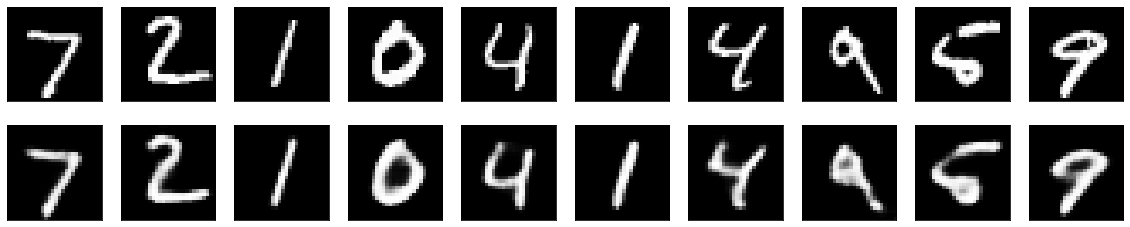

In [20]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [23]:
encoded_imgs = encoder.predict(x_test)

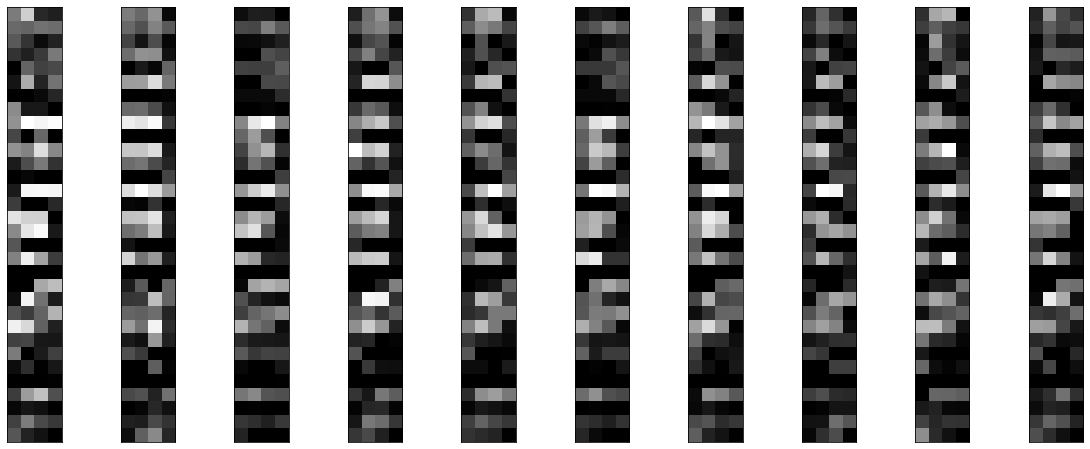

In [24]:
n = 10
plt.figure(figsize=(20, 8))

for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(4, 4*8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Application to image denoising

In [35]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

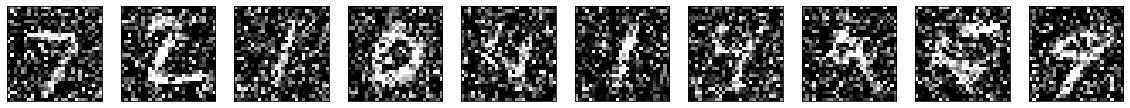

In [36]:
n = 10
plt.figure(figsize=(20, 2))

for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [43]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [44]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [45]:
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test), callbacks=[TensorBoard(log_dir='tmp/tb', histogram_freq=0, write_graph=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 140s 2ms/step - loss: 0.1803 - val_loss: 0.1222
Epoch 2/100
60000/60000 [==============================] - 143s 2ms/step - loss: 0.1211 - val_loss: 0.1120
Epoch 3/100
60000/60000 [==============================] - 143s 2ms/step - loss: 0.1133 - val_loss: 0.1090
Epoch 4/100
60000/60000 [==============================] - 143s 2ms/step - loss: 0.1090 - val_loss: 0.1074
Epoch 5/100
60000/60000 [==============================] - 142s 2ms/step - loss: 0.1066 - val_loss: 0.1050
Epoch 6/100
60000/60000 [==============================] - 131s 2ms/step - loss: 0.1049 - val_loss: 0.1032
Epoch 7/100
60000/60000 [==============================] - 131s 2ms/step - loss: 0.1038 - val_loss: 0.1054
Epoch 8/100
60000/60000 [==============================] - 131s 2ms/step - loss: 0.1028 - val_loss: 0.1014
Epoch 9/100
60000/60000 [==============================] - 131s 2ms/step - loss: 0.1022 - val_

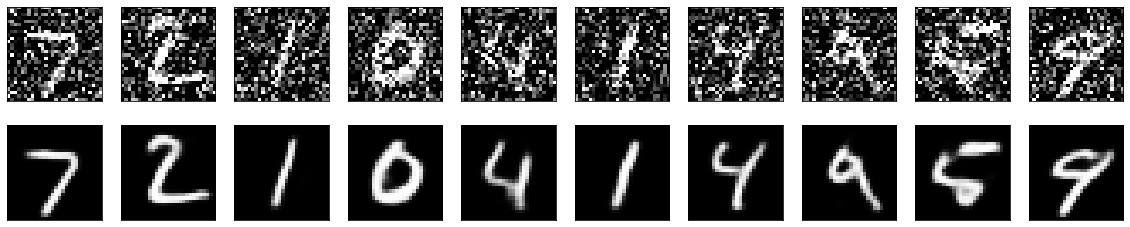

In [47]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [1]:
#from __future__ import absolute_imoprt
#from __future__ import division
#from __future__ import print_function

from keras.layers import Lambda, Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.losses import mse, binary_crossentropy
from keras.utils import plot_model
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import argparse
import os

Using TensorFlow backend.


In [2]:
def sampling(args):
    
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [15]:
def plot_results(models, data, batch_size=128, model_name="vae_mnist"):
    
    encoder, decoder = models
    x_test, y_test = data
    os.makedirs(model_name, exist_ok=True)
    
    filename = os.path.join(model_name, "vae_mean.png")
    z_mean, _, _ = encoder.predict(x_test, batch_size=batch_size)
    
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y_test)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.savefig(filename)
    plt.show()
    
    filename = os.path.join(model_name, "digits_over_latent.png")
    
    n = 30
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))
    
    grid_x = np.linspace(-4, 4, n)
    grid_y = np.linspace(-4, 4, n)[::-1]
    
    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i+1) * digit_size,
                   j * digit_size: (j+1) * digit_size] = digit
    
    plt.figure(figsize=(10, 10))
    start_range = digit_size // 2
    end_range = (n-1) * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap='Greys_r')
    plt.savefig(filename)
    plt.show()           

In [16]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

image_size = x_train.shape[1]
original_dim = image_size * image_size
x_train = np.reshape(x_train, [-1, original_dim])
x_test = np.reshape(x_test, [-1, original_dim])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [17]:
input_shape = (original_dim, )
intermediate_dim = 512
batch_size = 128
latent_dim = 2
epochs = 50

In [18]:
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

In [19]:
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

In [20]:
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()
plot_model(encoder, to_file='vae_mlp_encoder.png', show_shapes=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 784)          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 512)          401920      encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            1026        dense_4[0][0]                    
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 2)            1026        dense_4[0][0]                    
__________________________________________________________________________________________________
z (Lambda)

In [21]:
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)

In [22]:
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
plot_model(decoder, to_file='vae_mlp_decoder.png', show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_sampling (InputLayer)      (None, 2)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1536      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               402192    
Total params: 403,728
Trainable params: 403,728
Non-trainable params: 0
_________________________________________________________________


In [23]:
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 784)               0         
_________________________________________________________________
encoder (Model)              [(None, 2), (None, 2), (N 403972    
_________________________________________________________________
decoder (Model)              (None, 784)               403728    
Total params: 807,700
Trainable params: 807,700
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 10s 165us/step - loss: 188.6978 - val_loss: 166.8359
Epoch 2/50
60000/60000 [==============================] - 9s 156us/step - loss: 161.9780 - val_loss: 158.1183
Epoch 3/50
60000/60000 [==============================] - 9s 156us/step - loss: 156.4738 - val_loss: 154.6862
Epoch 4/50
60000/60

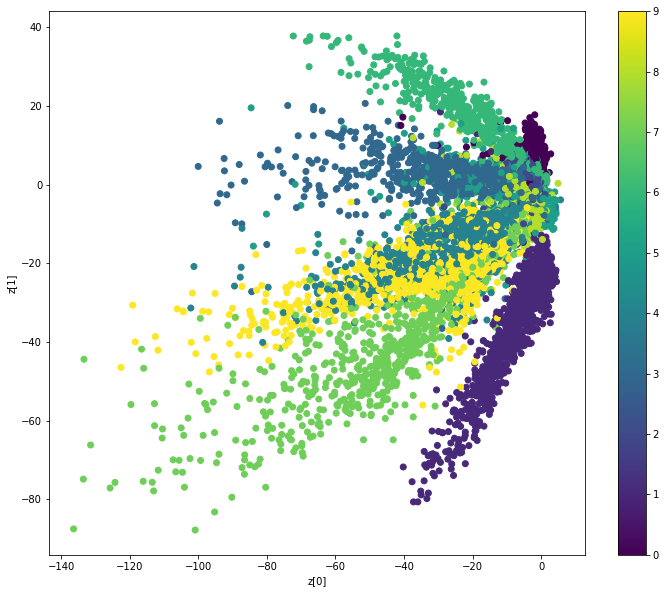

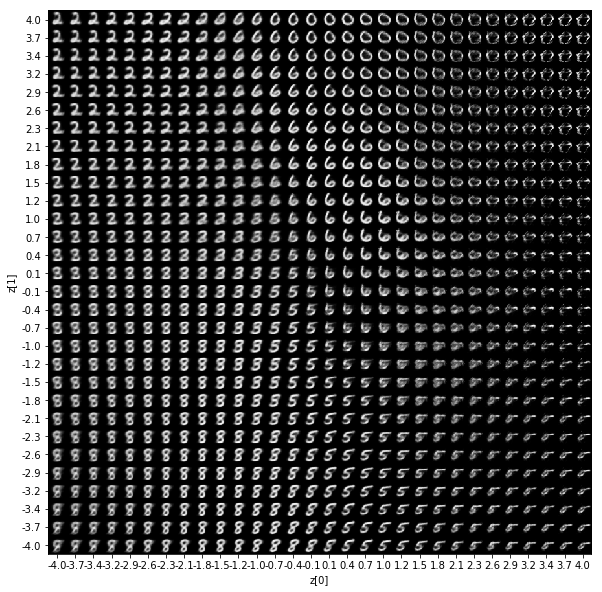

In [24]:
if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    help_ = "Load h5 model trained weights"
    parser.add_argument("-w", "--weights", help=help_)
    help_ = "Use mse loss instead of binary cross entropy (default)"
    parser.add_argument("-m", "--mse", help=help_, action='store_true')
    
    args = parser.parse_args(args=[])
    models = (encoder, decoder)
    data = (x_test, y_test)
    
    if args.mse:
        reconstruction_loss = mse(inputs, outputs)
    else:
        reconstruction_loss = binary_crossentropy(inputs, outputs)
        
    reconstruction_loss *= original_dim
    kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss = -0.5
    vae_loss = K.mean(reconstruction_loss + kl_loss)
    vae.add_loss(vae_loss)
    vae.compile(optimizer='adam')
    vae.summary()
    
    plot_model(vae, to_file='vae_mlp.png', show_shapes=True)
    
    if args.weights:
        vae.load_weights(args.weights)
    else:
        vae.fit(x_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, None))
    
    plot_results(models, data, batch_size=batch_size, model_name="vae_mlp")